<a href="https://www.kaggle.com/code/atchayvarma/spaceship-titanic?scriptVersionId=108359109" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Spaceship Titanic 🚀**

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!


To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history 😂 !

![](https://media.giphy.com/media/3owvKgRjmrtgJikO7C/giphy.gif)


# **Dataset📅**

* `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
* `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* `Destination` - The planet the passenger will be debarking to.
* `Age` - The age of the passenger.
* `VIP` - Whether the passenger has paid for special VIP service during the voyage.
* `RoomService`, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* `Name` - The first and last names of the passenger.
* `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

***Target Value: `Transported`***

# **Required Libraries📚**

In [1]:
# Dataprocessing
import numpy as np 
import pandas as pd


# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


# **File path📂**

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
tr_path = '/kaggle/input/spaceship-titanic/train.csv'
ts_path = '/kaggle/input/spaceship-titanic/test.csv'

# **Preprocessing⚒️**

## **Look at Dataset:**






**Training dataset:**

In [4]:
tr_df = pd.read_csv(tr_path)
tr_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Test dataset:**

In [5]:
ts_df = pd.read_csv(ts_path)
ts_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
print(f"Training Dataset(Row,Columns): {tr_df.shape}")
print(f"Test Dataset(Row,Columns): {ts_df.shape}")

Training Dataset(Row,Columns): (8693, 14)
Test Dataset(Row,Columns): (4277, 13)


### **Time for preprocessing🧐**

In [7]:
## Column information 
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
## Statistic Summary
tr_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
# Converting Cabin column into CabinDeck, CabinNumber and CabinSide
tr_df[['CabinDeck', 'CabinNo', 'CabinSide']] = tr_df['Cabin'].str.split("/", expand=True)
ts_df[['CabinDeck', 'CabinNo', 'CabinSide']] = ts_df['Cabin'].str.split("/", expand=True)

## Removing the Name and Cabin columns from both the datasets 

tr_df.drop(['Name','Cabin'],axis=1,inplace=True)
ts_df.drop(['Name',"Cabin"],axis=1,inplace=True)

## **Missing values🚫**

We will find and replace all the missing values in every columns with the most frequent values (mode).

In [10]:
tr_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
CabinDeck       199
CabinNo         199
CabinSide       199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [11]:
## Columns with null values
null_cols = ['CryoSleep','ShoppingMall','VIP','HomePlanet','VRDeck','FoodCourt','Spa','Destination','RoomService','Age','CabinDeck', 'CabinNo', 'CabinSide']


## Filling Na values
for col in null_cols:
    print(f"{col}:\n{tr_df[col].value_counts()}\n", "-"*50)
    tr_df[col] = tr_df[col].fillna(
    tr_df[col].dropna().mode().values[0])
    
    
## After filling Na values

print(f"After filling NA Values\n", "#"*50)

tr_df.isnull().sum().sort_values(ascending=False)

CryoSleep:
False    5439
True     3037
Name: CryoSleep, dtype: int64
 --------------------------------------------------
ShoppingMall:
0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64
 --------------------------------------------------
VIP:
False    8291
True      199
Name: VIP, dtype: int64
 --------------------------------------------------
HomePlanet:
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
 --------------------------------------------------
VRDeck:
0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64
 --------------------------------------------------
FoodCourt:
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53


PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinNo         0
CabinSide       0
dtype: int64

# **Data Visualization📊**

First we can seaparate our data into categorical and numerical values for better visulization. Which can be done using the `.select_dtypes('dtype').columns.to_list()`

In [12]:
# Numeric values 
num = tr_df.select_dtypes('number').columns.to_list()

# Categorical values
cat = tr_df.select_dtypes(['object','bool']).columns.to_list()



# Datasets

tr_num_df = tr_df[num]
tr_cat_df = tr_df[cat]

True     4378
False    4315
Name: Transported, dtype: int64


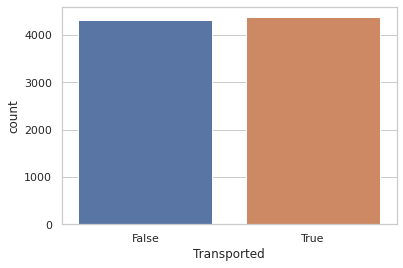

In [13]:
# Lets plot the Transported column to know the propotion of transported and those who are not 

print(tr_df['Transported'].value_counts())
      
sns.set(style="whitegrid")
sns.countplot(x=tr_df['Transported'])      
      
plt.show()      

**Numerical plots:**

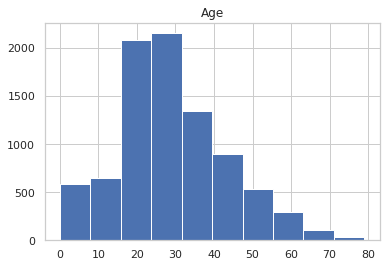

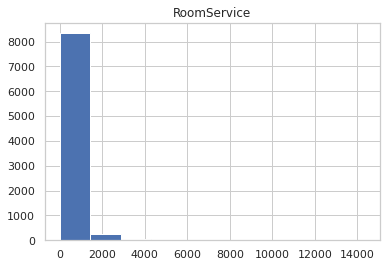

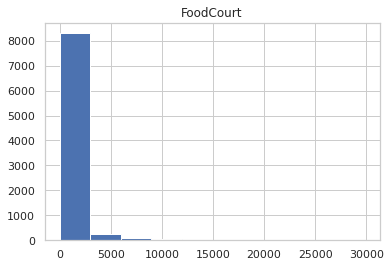

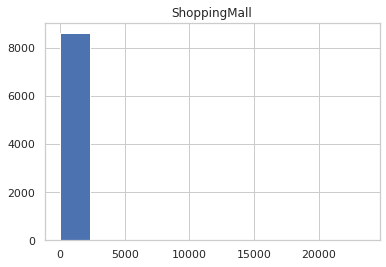

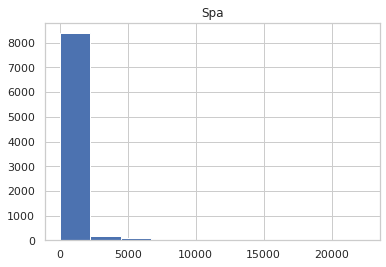

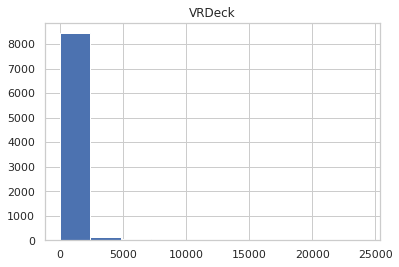

In [14]:
for i in tr_num_df:
    plt.hist(tr_num_df[i])
    plt.title(i)
    plt.show()

**Categorical plots:**

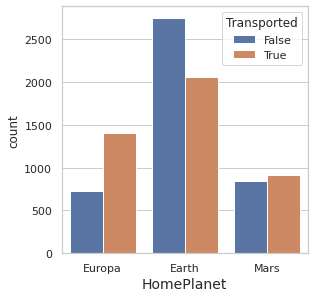

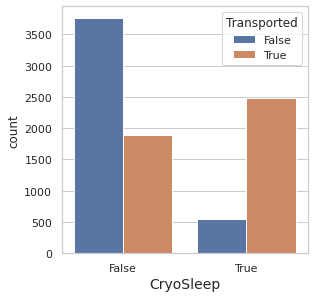

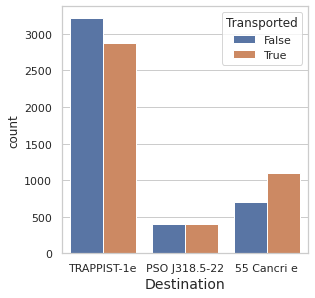

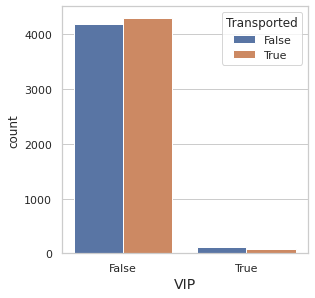

In [15]:
for i in cat[1:5]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i,data=tr_df,hue='Transported')
    plt.xlabel(i,fontsize=14)


# **Encoding categorical values to numeric values**

In [16]:
## Look at the dtype
tr_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
CabinDeck        object
CabinNo          object
CabinSide        object
dtype: object

In [17]:

# Converting categorical values into numeric values
tr_df = pd.get_dummies(tr_df, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                                     'CabinDeck', 'CabinSide'], drop_first=True)
ts_df = pd.get_dummies(ts_df, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                                     'CabinDeck', 'CabinSide'], drop_first=True)

print(tr_df.info(), "\n\n", ts_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   bool   
 8   CabinNo                    8693 non-null   object 
 9   HomePlanet_Europa          8693 non-null   uint8  
 10  HomePlanet_Mars            8693 non-null   uint8  
 11  CryoSleep_True             8693 non-null   uint8  
 12  Destination_PSO J318.5-22  8693 non-null   uint8  
 13  Destination_TRAPPIST-1e    8693 non-null   uint8

# **Correlation Matrix 📈**

<AxesSubplot:>

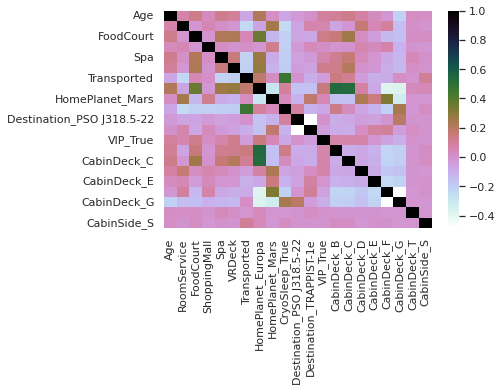

In [18]:
## Ploting correlation matrix
sns.heatmap(tr_df.corr(),cmap='cubehelix_r')

In [19]:
# Correlation table for better analysis

tr_df.corr().style.background_gradient(cmap='coolwarm')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_S
Age,1.000000,0.068915,0.127376,0.033619,0.120655,0.099583,-0.074153,0.217005,0.015410,-0.072235,-0.027894,0.002543,0.092271,0.103460,0.125922,0.076806,0.028028,-0.016418,-0.210003,0.013823,0.011388
RoomService,0.068915,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.066635,0.245222,-0.244089,-0.063354,0.060680,0.056566,-0.064536,-0.019494,0.160699,0.043935,0.092507,-0.145289,0.007525,-0.006991
FoodCourt,0.127376,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,0.365102,-0.124755,-0.205928,-0.065400,-0.078269,0.125499,0.155351,0.257511,0.020128,-0.038889,-0.129681,-0.149911,0.014267,0.019682
ShoppingMall,0.033619,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.021155,0.111654,-0.207798,-0.031245,0.031855,0.018412,-0.010750,0.000906,0.054823,0.031747,0.070135,-0.108538,-0.006787,-0.020940
Spa,0.120655,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,0.266103,-0.087989,-0.198307,-0.053303,-0.032897,0.060991,0.114257,0.163670,0.033486,-0.011736,-0.077820,-0.124342,0.036316,0.005700
VRDeck,0.099583,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,0.282556,-0.111863,-0.192721,-0.044861,-0.051119,0.123061,0.122644,0.206639,-0.003542,-0.017905,-0.095178,-0.127434,0.012369,-0.009089
Transported,-0.074153,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,0.176916,0.019544,0.460132,0.000092,-0.096319,-0.037261,0.144733,0.108193,-0.034046,-0.097965,-0.086360,0.016269,-0.014568,0.101397
HomePlanet_Europa,0.217005,-0.066635,0.365102,-0.021155,0.266103,0.282556,0.176916,1.000000,-0.287022,0.093395,-0.163308,-0.156958,0.147008,0.538379,0.525633,0.080738,-0.077058,-0.378610,-0.368075,0.030943,0.040700
HomePlanet_Mars,0.015410,0.245222,-0.124755,0.111654,-0.087989,-0.111863,0.019544,-0.287022,1.000000,0.032715,-0.111260,0.177243,0.043523,-0.158020,-0.154428,0.232730,0.145291,0.326252,-0.325315,-0.012083,-0.021160
CryoSleep_True,-0.072235,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,0.093395,0.032715,1.000000,0.087764,-0.113380,-0.078281,0.124049,0.028433,-0.066678,-0.110644,-0.209035,0.241399,-0.017579,0.023858


## Conculsion from the Correlation Matrix

From the above correlation matrix we can conclude that the `Transported` is more dependent on `CryoSleep` column with the higher correlation of **0.460132**. So, the target value(`Transported`) is more depent on `CrypoSleep`

# Machine Learning Models 🤖

First we should divide our datasets into two variable X as the features that will define the target variable y which is `Transported`

**Models we will use:**
* **Decision Tree**
* **Random Forest**
* **XGBoost**
* **Logisitic Regression**


**The plan:**
1. **Importing the model** 
2. **Fitting the model**
3. **Predictind `Transported`**
4. **Reporting the accuracy**

In [20]:
## Spliting the datasets

y = tr_df['Transported']
X = tr_df.drop('Transported', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0 )

## **Decision Tree**

In [21]:
DT = DecisionTreeClassifier(random_state=6)

## Fitting the models
DT.fit(X_train,y_train)


## Predicting the values
y_predict = DT.predict(X_test)

# Printing the classification report 
print(classification_report(y_test,y_predict))

# Score of the model
DT_SC = accuracy_score(y_predict,y_test)

print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

       False       0.75      0.72      0.73      1303
        True       0.73      0.76      0.74      1305

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608

73.81% Accurate


## **Logisitic Regression**

In [22]:
LR = LogisticRegression(random_state=6)

## Fitting the models
LR.fit(X_train,y_train)


## Predicting the values
y_predict = LR.predict(X_test)

# Printing the classification report 
print(classification_report(y_test,y_predict))

# Score of the model
LR_SC = accuracy_score(y_predict,y_test)

print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

       False       0.87      0.65      0.74      1303
        True       0.72      0.90      0.80      1305

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.77      2608
weighted avg       0.79      0.78      0.77      2608

77.61% Accurate


## **Random Forest Classifier**

In [23]:
RF = RandomForestClassifier(random_state=6,criterion='entropy',max_features='auto',n_estimators=125,max_depth=19)

## Fitting the models
RF.fit(X_train,y_train)


## Predicting the values
y_predict = RF.predict(X_test)

# Printing the classification report 
print(classification_report(y_test,y_predict))

# Score of the model
RF_SC = accuracy_score(y_predict,y_test)

print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

       False       0.79      0.82      0.81      1303
        True       0.81      0.79      0.80      1305

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608

80.21% Accurate


## **Exporting the precited values**

Out of the 3 models `RandomForestClassifier` has the highest accuracy of **79.95**. So we can export value from that


In [24]:
## Creating the dataframe 

transported = pd.DataFrame({"PassengerId": X_test['PassengerId'], "Transported": y_predict})
transported.to_csv("submission.csv",index=False)

print("Submission was successfully saved!")

Submission was successfully saved!


If you found this interesting. Please consider Upvoting!!!!


![](https://media.giphy.com/media/BWD3CtcudWL28/giphy.gif)
